In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Github Data Exploration
In this file, the dataset gathered from github repos will be explored for different aspects and insights regarding the nature of the data.

## Load Data

In [2]:
data = pd.read_csv('../Data/github.csv')

data.head()

,idd,name,bio,website,company,id,description,readme
0,1,Algorithms-DataStructures-Python,Former Deep Learning Intern | Lead Programmer...,https://www.callitabhi.com/,CallitAbhi,672799594,Welcome to my Algorithms and Data Structures r...,# Algorithms-DataStructures-Python\r\n\r\n- `b...
1,2,LSTockMarket-Predictions,NaN,NaN,NaN,312675095,"Brown Deep Learning Final Project. Dylan, Arma...",# Deep-Final\r\nBrown Deep Learning Final Proj...
2,3,SentencewiseSentimentAnalysis,NaN,NaN,NaN,37077670,This is sample code to show how to use deep le...,# SentencewiseSentimentAnalysis\r\nThis is sam...
3,4,Project,NaN,NaN,NaN,287696866,Intershala Project,# Project\r\nIntershala Project\r\n\r\nProblem...
4,5,Stanford-Machine-Learning,machine learning enthusiast / data science pra...,NaN,NaN,39927341,Online Course material from Coursera,# Stanford-Machine-Learning\r\nOnline Course m...


## Basic Exploratory Analysis

In [3]:
print(f"The dataset's shape is: {data.shape}")

The dataset's shape is: (561932, 8)


### Data Format and Range
- only id has a minimum charachter count more than 1. 

In [4]:
min_char_counts = data.apply(lambda x: x.astype(str).str.len().min())

print(f"The minimum character counts are:")
print(min_char_counts.to_markdown())

The minimum character counts are:
|             |   0 |
|:------------|----:|
| idd         |   1 |
| name        |   1 |
| bio         |   1 |
| website     |   1 |
| company     |   1 |
| id          |   4 |
| description |   1 |
| readme      |   1 |


In [5]:
max_char_counts = data.apply(lambda x: x.astype(str).str.len().max())

print(f"The maximum character counts are:")
print(max_char_counts.to_markdown())

The maximum character counts are:
|             |      0 |
|:------------|-------:|
| idd         |      6 |
| name        |    100 |
| bio         |   1120 |
| website     |   1438 |
| company     |    453 |
| id          |      9 |
| description |  32505 |
| readme      | 489927 |


In [6]:
# Hardcoded list of non-numeric columns identified from the notebook
non_numeric_columns = ["name", "bio", "website", "company", "description", "readme"]

# Function to calculate the word count for each entry in specified columns
def calculate_word_count_range(data, columns):
    word_count_ranges = {}
    for col in columns:
        word_counts = data[col].dropna().apply(lambda x: len(str(x).split()))
        word_count_ranges[col] = {
            'min': word_counts.min(),
            'max': word_counts.max(),
            'range': word_counts.max() - word_counts.min()
        }
    return word_count_ranges

# Calculate and display the word count range for each specified column
word_count_ranges = calculate_word_count_range(data, non_numeric_columns)
for col, stats in word_count_ranges.items():
    print(f"{col}: Min words = {stats['min']}, Max words = {stats['max']}, Range = {stats['range']}")


name: Min words = 1, Max words = 1, Range = 0
bio: Min words = 0, Max words = 43, Range = 43
website: Min words = 1, Max words = 21, Range = 20
company: Min words = 1, Max words = 36, Range = 35
description: Min words = 0, Max words = 5145, Range = 5145
readme: Min words = 0, Max words = 112739, Range = 112739


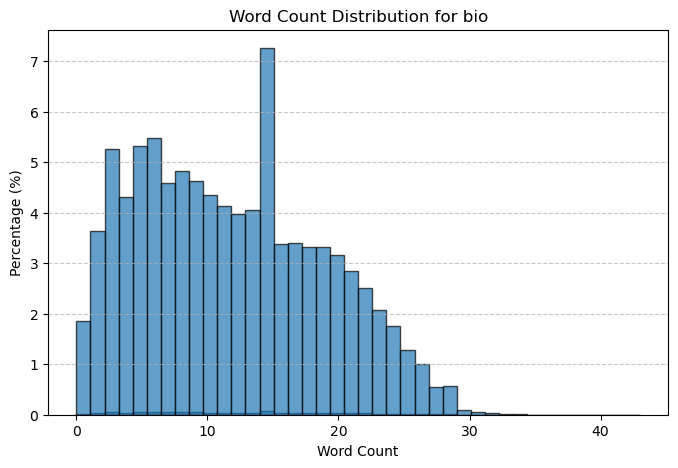

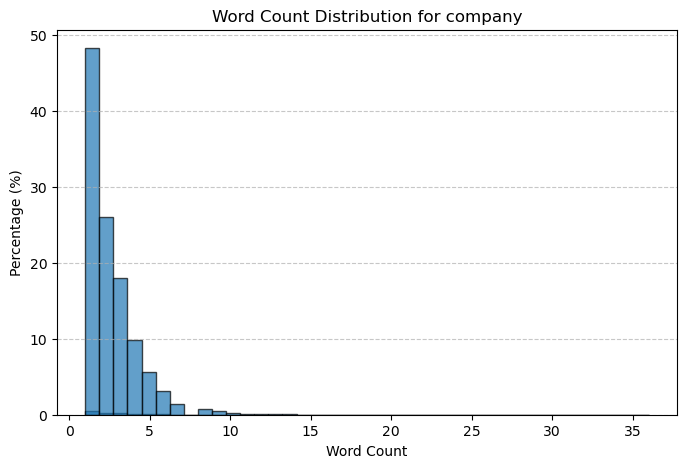

In [11]:
# Visualizing the word count distribution as percentages for 'bio' and 'company'
def plot_word_count_distribution(data, columns):
    for col in columns:
        word_counts = data[col].dropna().apply(lambda x: len(str(x).split()))
        
        plt.figure(figsize=(8, 5))
        # Normalize histogram to display percentages
        counts, bins, _ = plt.hist(word_counts, bins=40, edgecolor='black', alpha=0.7, density=True)
        # Convert frequencies to percentages
        percentages = counts * 100
        bin_centers = 0.5 * (bins[:-1] + bins[1:])
        plt.bar(bin_centers, percentages, width=np.diff(bins), edgecolor='black', alpha=0.7)
        
        plt.title(f'Word Count Distribution for {col}')
        plt.xlabel('Word Count')
        plt.ylabel('Percentage (%)')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Call the function for 'bio' and 'company' columns
plot_word_count_distribution(data, ['bio', 'company'])


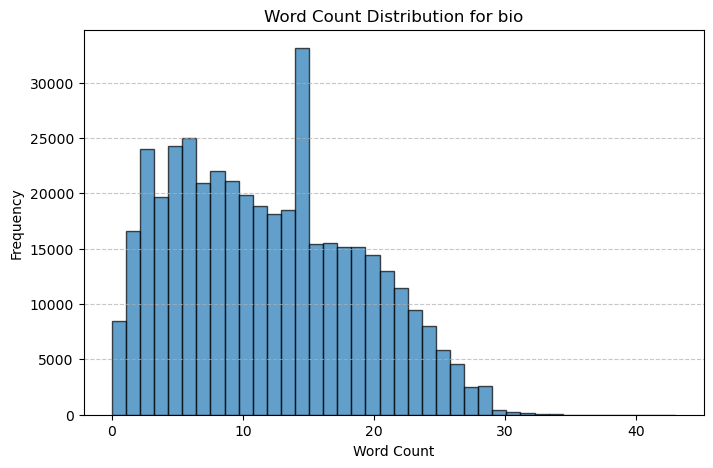

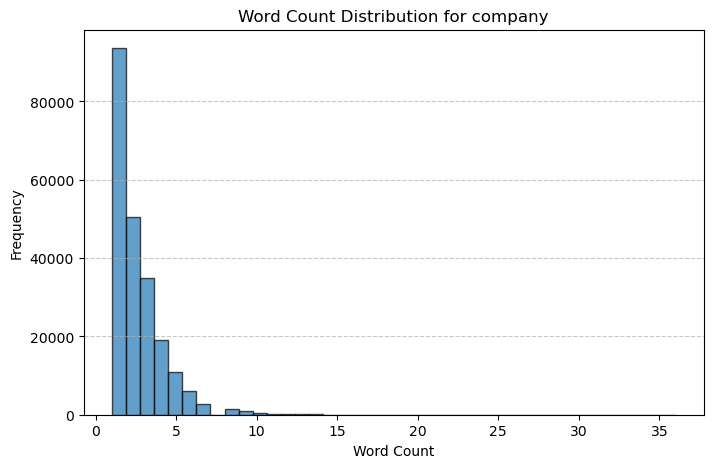

In [7]:
# Visualizing the word count distribution for 'bio' and 'company'
def plot_word_count_distribution(data, columns):
    for col in columns:
        word_counts = data[col].dropna().apply(lambda x: len(str(x).split()))
        
        plt.figure(figsize=(8, 5))
        plt.hist(word_counts, bins=40, edgecolor='black', alpha=0.7)
        plt.title(f'Word Count Distribution for {col}')
        plt.xlabel('Word Count')
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Call the function for 'bio' and 'company' columns
plot_word_count_distribution(data, ['bio', 'company'])

Top 10 words in bio:
 and         208640
|           153551
Machine     140461
in          138157
Learning    125823
Data        107702
of           69697
at           67343
a            64567
learning     59265
dtype: int64


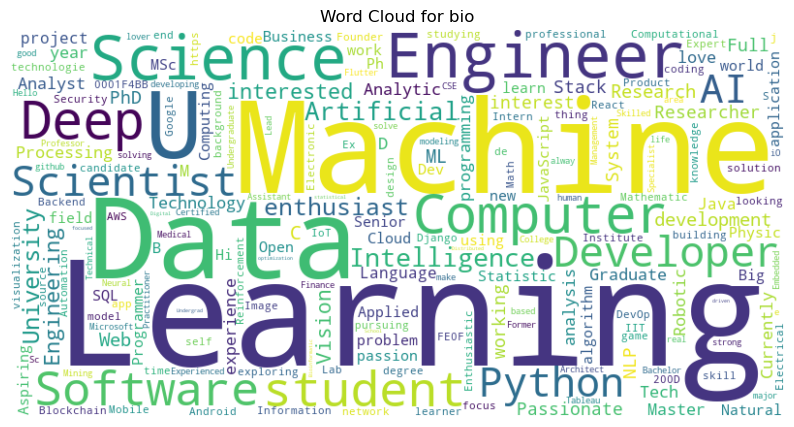

Top 10 words in company:
 University    40168
of            28072
Technology     6782
Institute      6102
and            4284
at             2819
|              2742
Science        2618
-              2581
Data           2527
dtype: int64


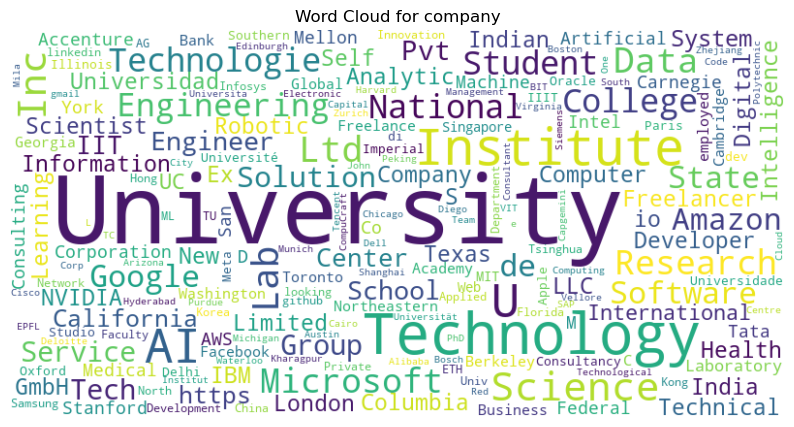

In [8]:
# Function to process words in a column for word count and word cloud
def analyze_text_column(data, column, show_wordcloud=False, display_top_n=10):
    # Join all text entries in the column and split into words
    text = ' '.join(data[column].dropna())
    words = text.split()  # Tokenize; can add more sophisticated tokenization if needed
    word_counts = Counter(words)  # Count words
    
    # Convert counts to a Series sorted in descending order
    word_count_series = pd.Series(word_counts).sort_values(ascending=False)
    
    # Display top N words
    print(f"Top {display_top_n} words in {column}:\n", word_count_series.head(display_top_n))
    
    # Generate and display word cloud if requested
    if show_wordcloud:
        wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for {column}')
        plt.axis('off')
        plt.show()
    
    return word_count_series

# Run the analysis for 'bio' and 'company' with word clouds
bio_word_counts = analyze_text_column(data, 'bio', show_wordcloud=True)
company_word_counts = analyze_text_column(data, 'company', show_wordcloud=True)

In [9]:
company_word_counts.head(50)

University      40168
of              28072
Technology       6782
Institute        6102
and              4284
at               2819
|                2742
Science          2618
-                2581
Data             2527
AI               2484
Research         2425
National         2403
&                2326
College          2226
Inc.             2184
Technologies     2110
State            2040
The              1980
de               1918
for              1847
Software         1815
Student          1812
Microsoft        1798
Amazon           1782
Engineering      1777
Services         1438
@                1395
IIT              1377
Google           1371
Solutions        1366
Labs             1338
Ltd.             1309
School           1309
Engineer         1294
Group            1276
Center           1205
Tech             1191
Ltd              1105
Indian           1070
/                1030
Technology,      1001
Limited           996
Inc               979
London            971
India     

### The Missing Data

There are Significant number of rows that are missing the data about website and company. Description, Readme and name are the columns with very low to none missing data.

In [10]:
na_count = data.isna().sum()
na_count

idd                 0
name                1
bio            137386
website        292797
company        340315
id                  0
description        12
readme           2258
dtype: int64

In [12]:
# calculate the percentage of missing values
na_percentage = na_count / len(data) * 100
na_percentage

idd             0.000000
name            0.000178
bio            24.448866
website        52.105415
company        60.561598
id              0.000000
description     0.002135
readme          0.401828
dtype: float64

### Duplicates
Dropping columns id and idd, 291 duplicates are found.
Dropping only idd, there is 18 duplicates, accopanying that with also dropping id, 291 duplicates.
- idd is unique for each row

In [13]:
print(f"Number of rows for the github dataset is: {data.shape[0]}")

temp = data.shape[0] - data.drop_duplicates().shape[0]
print(f"duplicate count without dropping any column is: {temp}")

temp = data.shape[0] - data.drop(columns=["id"]).drop_duplicates().shape[0]
print(f"Duplicate count for all columns except id: {temp}")

temp = data.shape[0] - data.drop(columns=["idd"]).drop_duplicates().shape[0]
print(f"Duplicate count for all columns except idd: {temp}")

temp = data.shape[0] - data.drop(columns=["idd", "id"]).drop_duplicates().shape[0]
print(f"Duplicate count for all columns except idd and id: {temp}")

Number of rows for the github dataset is: 561932
duplicate count without dropping any column is: 0
Duplicate count for all columns except id: 0
Duplicate count for all columns except idd: 18
Duplicate count for all columns except idd and id: 291


Looking at an example of duplicates in id column, we notice the rows are absolutey the same.

In [14]:
print(data["id"].value_counts().sort_values(ascending=False).head(5).to_markdown())
print()
print("rows with id 703291877 is:")
print(data[data["id"] == 703291877].to_string(index=False))

|        id |   count |
|----------:|--------:|
| 703291877 |       3 |
| 701887244 |       3 |
| 698887842 |       3 |
| 698919769 |       2 |
| 643330227 |       2 |

rows with id 703291877 is:
   idd name                                bio website company        id                        description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

Looking at rows that are not duplicate without idd column, but without both idd and id, are considered so.

In [15]:
idd_id_dups = data[data.drop(columns=["idd", "id"]).duplicated()]
idd_id_dups["id"].value_counts().sort_values(ascending=False).head(5)

id
701887244    2
703291877    2
698887842    2
262609246    1
251368830    1
Name: count, dtype: int64

Rows that have duplicates for non id + idd columns

In [16]:
wanted_rows_id_idd = data[data.drop(columns=["idd", "id"]).duplicated(keep=False)]
print(wanted_rows_id_idd.head().to_string(index=False))

#print shape
print()
print(f"Shape of the dataset is: {wanted_rows_id_idd.shape}")

 idd                         name bio website company        id                                                                                                                         description                                                                                                                                                                                                                                                                                                                             readme
 570 Stock-Market-Price-Predictor NaN     NaN     NaN 524396620 This is an attempt to make a Machine Learning Model which predicts the Future Stock Market Price using Linear Regression Algorithm. # Stock-Market-Price-Predictor\r\nThis is an attempt to make a Machine Learning Model which predicts the Future Stock Market Price using Linear Regression Algorithm.\r\n\r\nThis approach is not valid since here the data is not standardized and hence the prediction obtained is biased.\

Rows that have dups for non idd columns

In [17]:
wanted_rows_idd = data[data.drop(columns=["idd"]).duplicated(keep=False)]
print(wanted_rows_idd.head().to_string(index=False))

#print shape
print()
print(f"Shape of the dataset is: {wanted_rows_idd.shape}")

  idd                                                name                                                                                                                               bio                                  website            company        id                                                                                                                                                                                             description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

find shared rows for the 2 to check if one is inclusive, => all rows in wanted_rows_idd are included in wanted_rows_idd_id

In [18]:
shared_dup_rows = wanted_rows_idd.merge(wanted_rows_id_idd, on=["id", "idd"], how="inner")
shared_dup_rows.shape[0]

33

check if these mutual values have 18 dups for non idd columns

In [19]:
shared_dup_rows.shape[0] - shared_dup_rows.drop(columns=["idd"]).drop_duplicates().shape[0]

18

now find the non shared ones

In [20]:
# left anti join to get the rows that are not shared
non_shared_dup_rows = wanted_rows_id_idd[~wanted_rows_id_idd["id"].isin(wanted_rows_idd["id"])]

print(non_shared_dup_rows.sort_values(by=["name"]).head().to_string(index=False))

   idd       name bio website company        id                     description                                          readme
424890        480 NaN     NaN     NaN 146799683                           IA480                                  # 480\r\nIA480
372081        480 NaN     NaN     NaN 146799699                           IA480                                  # 480\r\nIA480
  5025         AI NaN     NaN     NaN  83171295         Artificial Intelligence                 # AI\r\nArtificial Intelligence
381957         AI NaN     NaN     NaN 385212180         Artificial Intelligence                 # AI\r\nArtificial Intelligence
396183 AI-Project NaN     NaN     NaN 302144136 Artificial Intelligence Project # AI-Project\r\nArtificial Intelligence Project


Check the number of dups which must be 219 - 18

In [141]:
non_shared_dup_rows.shape[0]

398

In [142]:
non_shared_dup_rows.drop(columns=["idd", "id"]).drop_duplicates().shape[0]

125

In [140]:
non_shared_dup_rows.shape[0] - non_shared_dup_rows.drop(columns=["idd", "id"]).drop_duplicates().shape[0]

273

In [114]:
duplicates_mask_idd_id = data.drop(columns=["idd", "id"]).duplicated(keep=False)

# extract all rows that have duplicates based on all columns except 'idd' and 'id'
temp_wanted = data[duplicates_mask_idd_id]
temp_wanted.shape[0]
 
# test if these rows have only 18 dup when we drop 'idd' column
temp_wanted.drop(columns=["idd"]).drop_duplicates().shape[0]

413

Check the number of duplicates

In [137]:
temp_wanted.drop(columns=["idd", "id"]).drop_duplicates().shape[0]

2

In [101]:
data.drop(columns=["idd", "id"]).duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
561927    False
561928    False
561929    False
561930    False
561931    False
Length: 561932, dtype: bool

In [5]:
duplicates = data.drop(columns=["idd", "id"]).duplicated().sum()
duplicates

291

As a proxy for users, we group the data with bio + website + company

In [21]:
# drop null company rows
non_missing_comp = data.dropna(subset=["company"])
unique_users = non_missing_comp.loc[:, ["bio", "website", "company"]]
unique_users = unique_users.drop_duplicates()

print("It is estimated that there are", unique_users.shape[0], "unique users out of ", non_missing_comp.shape[0]," rows.")


It is estimated that there are 88976 unique users out of  221617  rows.


In [23]:
# group the data by 3 columns and count the number of rows in each group
grouped = data.groupby(["bio", "website", "company"]).size()
print(grouped.head(10).to_markdown())

|                                                                              |   0 |
|:-----------------------------------------------------------------------------|----:|
| ('\r\r\n', '1653408133@qq.com', 'China University of Geosciences,Wuhan')     |   1 |
| ('\r\r\n', 'alemel.is', '@vivacitylabs')                                     |   1 |
| ('\r\r\n', 'borisov1990@gmail.com', '+359 897 79 25 88')                     |   1 |
| ('\r\r\n', 'cityloop.cc', 'Cityloop')                                        |   1 |
| ('\r\r\n', 'dataisland.org', 'Northwestern University')                      |   1 |
| ('\r\r\n', 'fb.com/zimmer.jeyy', 'Kozocom')                                  |   1 |
| ('\r\r\n', 'http://damir.cavar.me/', 'Indiana University')                   |  11 |
| ('\r\r\n', 'https://deepayan137.github.io/', 'IIT-H')                        |   2 |
| ('\r\r\n', 'https://eddiegulay.github.io', '@Louella-Company ')              |   1 |
| ('\r\r\n', 'https://geoecology.wixsite.co

## A closer look at rows with comany name

The data that have a value for their company are a priority, exploration is focused on these rows for the initial Exploration

In [25]:
filtered_data = data[data['company'].notna()]
print(f"The remaining data's shape is: {filtered_data.shape}")

The remaining data's shape is: (221617, 8)


In [26]:
filtered_data.head()

,idd,name,bio,website,company,id,description,readme
0,1,Algorithms-DataStructures-Python,Former Deep Learning Intern | Lead Programmer...,https://www.callitabhi.com/,CallitAbhi,672799594,Welcome to my Algorithms and Data Structures r...,# Algorithms-DataStructures-Python\r\n\r\n- `b...
8,9,Hindi-character-recognition,NaN,NaN,Sarvajanik College of Engineering & Technology,667535261,"In this work, we propose a technique to recogn...","# Hindi-character-recognition\r\nIn this work,..."
11,12,plant_leaf_disease_detection,Machine learning & Deep Learning Practitioner....,https://abhinav3.github.io/,IIT Guwahati,692408006,plant leaf disease detection,plant leaf disease detection and classificatio...
15,16,tello_python,IoT | Deep Learning | Machine Learning | Embed...,https://www.linkedin.com/in/adithya-u-r-795866...,KTH Royal Insitute Of Technology,185018601,Gesture based control of Tello drone using python,# TelloSDKPy\r\nDJI Tello drone python interfa...
17,18,Deep-Learning-Projects,Machine Learning Enthusiast and loves to innov...,NaN,Tata Consultancy Services,431716441,It contains Deep-Learning projects designed on...,# Deep-Learning-Projects\r\nIt contains Deep-L...


Except bio and website, the other value are not missing a significant number of data.

In [27]:
filtered_data.isna().sum()

idd                0
name               1
bio            22878
website        81395
company            0
id                 0
description        4
readme           890
dtype: int64

There are 56000 unique company names _ no preprocessing applied

In [28]:
len(filtered_data["company"].unique())

56429

unique count of companies are 1/4 of the rows count. 

In [29]:
len(filtered_data["company"].unique())/(filtered_data.shape[0])

0.25462396837787715

### Unique values for company

There are obvious companies and institutions among the unique companies, but also there are values such as student and freelancer which are irrelevant.

In [30]:
filtered_data["company"].value_counts().head(20)

company
Microsoft                            1552
Amazon                               1062
Google                                986
Student                               841
Carnegie Mellon University            568
IBM                                   531
Northeastern University               435
Columbia University                   435
Freelancer                            418
New York University                   400
Accenture                             394
Stanford University                   391
University of Toronto                 380
NVIDIA                                379
Imperial College London               373
University of Cambridge               366
University of Southern California     363
Tata Consultancy Services             354
Tsinghua University                   337
Amazon Web Services                   327
Name: count, dtype: int64

There are noisy values and values with encoding problems in the data
- "<U+043D><U+0443><U+043B><U+043B>"
-  @deezer

In [31]:
filtered_data["company"].tail(20)

561882                                 Confluent 
561886        NYU Schack Institute of Real Estate
561889                  The University of Alabama
561892                     University of Burgundy
561893                                      Baidu
561898                  Grras Solutions Pvt Ltd. 
561901                                      ONERA
561902                                       Flix
561905                                  Blackrock
561906    Societe Generale Global Solution Centre
561910                                 SK Telecom
561911           <U+043D><U+0443><U+043B><U+043B>
561912                               @huggingface
561914                 National Taiwan University
561916                                   @deezer 
561919                                 NUDT&SWUFE
561921                Sapienza University of Rome
561924                   Johns Hopkins University
561925             Kochi University of Technology
561929                      LIBRA AI Technologies


### Distribution of unique values

In [32]:
value_counts = filtered_data["company"].value_counts()

# statistical parameters of the value counts
value_counts.describe()

count    56429.000000
mean         3.927360
std         15.492701
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       1552.000000
Name: count, dtype: float64

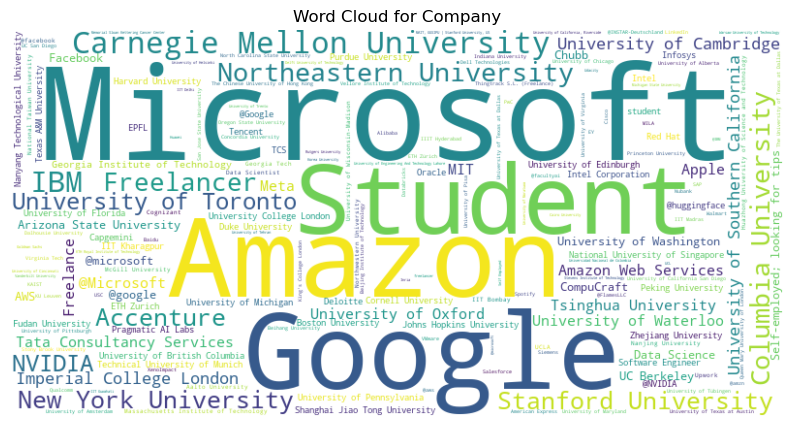

In [37]:
# word cloud of company values
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate_from_frequencies(value_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Company')
plt.axis('off')
plt.show()


### Company Column Quality assessment
A first glance at issues that lower the quality of the company column

#### Lowercase/Uppercase and Trimming
1102 reduction in unique values is achieved with trimming and lowercasing

In [33]:
processed_companies = filtered_data["company"]

# transform the company column to lowercase
processed_companies = processed_companies.str.lower()

# trim the company column
processed_companies = processed_companies.str.strip()

reduced_unique_count = len(filtered_data["company"].unique()) - len(processed_companies.unique())

print(f"The reduced unique count is: {reduced_unique_count}")

The reduced unique count is: 3321


#### Non alphebatic values

In [34]:
# use regex to find non-alphabetical characters
non_alpha_companies = processed_companies[~processed_companies.str.match(r'^[a-z\s]*$')]

print(f"The number of unique companies with non-alphabetical characters is: {len(non_alpha_companies.unique())}")
print()
print(non_alpha_companies.value_counts().head(20).to_markdown())
print()
print(non_alpha_companies.value_counts().tail(20).to_markdown())

The number of unique companies with non-alphabetical characters is: 24473

| company                         |   count |
|:--------------------------------|--------:|
| @microsoft                      |     717 |
| @google                         |     519 |
| self-employed; looking for tips |     259 |
| @nvidia                         |     231 |
| @huggingface                    |     204 |
| @facebook                       |     195 |
| @aws                            |     168 |
| texas a&m university            |     144 |
| self-employed                   |     125 |
| university of wisconsin-madison |     122 |
| eth zürich                      |     115 |
| @amzn                           |     115 |
| thingtrack s.l. (freelance)     |     112 |
| @ibm                            |     110 |
| @facultyai                      |     107 |
| @flamesllc                      |     105 |
| king's college london           |      96 |
| university of tübingen          |      95 |
| @in

There Are non english letters, encoding issues, symbols within the company data

In [35]:
import re

non_alpha_chars = re.findall(r'[^a-zA-Z\s]', non_alpha_companies.str.cat(sep=''))
non_alpha_chars = list(set(non_alpha_chars))

print(non_alpha_chars)

['+', 'ä', '-', 'ï', '[', '¯', '{', '`', '\x92', '\x8a', '8', 'ü', 'è', '_', 'ú', '*', '\x99', '3', 'ê', 'ð', '}', '2', '<', 'â', ',', '#', '^', 'é', '«', 'õ', '²', 'ô', 'ö', "'", 'æ', ':', '(', 'í', '©', 'º', '?', '"', '\x93', 'ø', '\x96', '&', '\x97', '=', 'ë', '\x95', '0', 'à', '\x94', '>', 'å', '·', '/', 'á', '$', '|', '5', '\x91', '»', ')', '!', '%', '7', 'ó', 'ç', '.', '9', '\x9a', '@', '6', '°', '\\', '®', 'ñ', ']', '4', '\x9e', '~', 'ã', ';', 'ò', '1']


### Missing readme
There are almost 800 instances of filtered rows than do not have a readme.

No noticeable pattern was found for missing readme and other columns

In [36]:
readme_missing_data = filtered_data[filtered_data["readme"].isna()].loc[:, ["name", "company", "description"]]

print(f"The number of rows with missing readme data is: {readme_missing_data.shape[0]}")
print()
print(readme_missing_data.head(20).to_markdown())
print()
print(readme_missing_data.tail(20).to_markdown())

The number of rows with missing readme data is: 890

|      | name                                | company                                           | description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
|-----:|:------------------------------------|:--------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------